<a href="https://colab.research.google.com/github/siriwatsc-debug/ProjectDADS5001/blob/main/DADS5001_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# install package for map
!pip install cartopy folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 68.0 MB/s eta 0:00:00


In [4]:
# Subject : DADS5001 - Tools and Programing
# Project : Pandas/Numpy
# Topic : Study the factors to occur the eartquake

import pandas as pd
import numpy as np

# load data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/all-event.xlsx')

df.head()
#df.describe()
df.shape
df.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14986 entries, 0 to 14985
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No.            14986 non-null  int64  
 1   REF. ID        14986 non-null  object 
 2   DATE-TIME UTC  14986 non-null  object 
 3   DATE THAI      14986 non-null  object 
 4   TIME THAI      14986 non-null  object 
 5   LAT.           14986 non-null  float64
 6   LONG.          14986 non-null  float64
 7   MAG.           14986 non-null  float64
 8   DEPTH.         14986 non-null  float64
 9   PHASE.         14986 non-null  int64  
 10  REGION.        14986 non-null  object 
 11  REGION..1      13875 non-null  object 
 12  DETAIL         11023 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1.5+ MB


In [5]:
# Rename existing columns
df2 = df.rename(columns={'No.':'no', 'REF. ID':'refid', 'DATE-TIME UTC':'dtutc','DATE THAI':'date','TIME THAI':'time', 'LAT.':'lat', 'LONG.':'long','MAG.':'mag', 'DEPTH.':'depth', 'PHASE.':'phase', 'REGION.':'region','REGION..1':'region1', 'DETAIL':'detail' }) # default: inplace=False
df = df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14986 entries, 0 to 14985
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   no       14986 non-null  int64  
 1   refid    14986 non-null  object 
 2   dtutc    14986 non-null  object 
 3   date     14986 non-null  object 
 4   time     14986 non-null  object 
 5   lat      14986 non-null  float64
 6   long     14986 non-null  float64
 7   mag      14986 non-null  float64
 8   depth    14986 non-null  float64
 9   phase    14986 non-null  int64  
 10  region   14986 non-null  object 
 11  region1  13875 non-null  object 
 12  detail   11023 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1.5+ MB


In [12]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.interpolate import griddata

# โหลดข้อมูล
#file_path = "/mnt/data/all event .xlsx"
#df = pd.read_excel(file_path)

# แปลงคอลัมน์เวลา
df['time'] = pd.to_datetime(df['time'])
df['Month'] = df['time'].dt.to_period("M")

# เตรียม lat/lon grid
lons = df['long'].values
lats = df['lat'].values
lon_lin = np.linspace(min(lons), max(lons), 150)
lat_lin = np.linspace(min(lats), max(lats), 150)
lon_grid, lat_grid = np.meshgrid(lon_lin, lat_lin)

# เตรียมข้อมูลสำหรับแต่ละเดือน
frames = []
for month, group in df.groupby('Month'):
    if len(group) < 3:
        continue
    mags = group['mag'].values
    lons = group['long'].values
    lats = group['lat'].values

    # interpolate magnitude
    mag_grid = griddata((lons, lats), mags, (lon_grid, lat_grid), method='cubic')

    frames.append(go.Frame(
        data=[
            go.Heatmap(
                x=lon_lin, y=lat_lin, z=mag_grid,
                colorscale="RdYlBu_r", zmin=df['mag'].min(), zmax=df['mag'].max(),
                colorbar=dict(title="Magnitude")
            ),
            go.Scatter(
                x=lons, y=lats, mode="markers",
                marker=dict(size=mags*3, color=mags, colorscale="RdYlBu_r", line=dict(color="black", width=1)),
                name="Earthquakes"
            )
        ],
        name=str(month)
    ))

# กราฟเริ่มต้น (frame แรก)
fig = go.Figure(
    data=frames[0].data,
    layout=go.Layout(
        title="Earthquake Magnitude Heatmap (Monthly)",
        xaxis=dict(title="Longitude"),
        yaxis=dict(title="Latitude"),
        updatemenus=[{
            "type": "buttons",
            "buttons": [
                {"label": "Play", "method": "animate", "args": [None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True}]},
                {"label": "Pause", "method": "animate", "args": [[None], {"frame": {"duration": 0}, "mode": "immediate"}]}
            ]
        }]
    ),
    frames=frames
)

# เพิ่ม Slider
fig.update_layout(
    sliders=[{
        "steps": [
            {"args": [[f.name], {"frame": {"duration": 500, "redraw": True}, "mode": "immediate"}],
             "label": f.name, "method": "animate"}
            for f in frames
        ],
        "transition": {"duration": 300},
        "x": 0.1, "y": -0.1,
        "len": 0.9
    }]
)

fig.show()


/usr/local/lib/python3.12/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


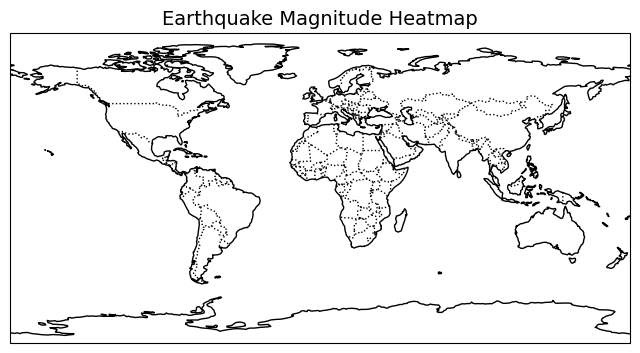

In [8]:
# Animation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata
from matplotlib.animation import FuncAnimation

# โหลดไฟล์ข้อมูล
#file_path = "/mnt/data/all event .xlsx"
#df = pd.read_excel(file_path)

# ตรวจสอบว่ามีคอลัมน์ Time หรือ DateTime
df['time'] = pd.to_datetime(df['time'])

# เรียงข้อมูลตามเวลา
df = df.sort_values('time')

# สร้างกรอบเวลา (เช่น รายวัน)
time_groups = df.groupby(df['time'].dt.date)

# เตรียม grid lat/lon
lons = df['long'].values
lats = df['lat'].values
lon_lin = np.linspace(min(lons), max(lons), 200)
lat_lin = np.linspace(min(lats), max(lats), 200)
lon_grid, lat_grid = np.meshgrid(lon_lin, lat_lin)

# ตั้งค่า plot
fig = plt.figure(figsize=(8,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.set_title("Earthquake Magnitude Heatmap", fontsize=14)

# initial plot
contour = None
sc = None

def update(frame):
    global contour, sc
    if contour:  # ลบ contour เก่า
        for coll in contour.collections:
            coll.remove()
    if sc:
        sc.remove()

    date, group = frame
    lons = group['Longitude'].values
    lats = group['Latitude'].values
    mags = group['Magnitude'].values

    if len(group) < 3:
        return

    # interpolate magnitude
    mag_grid = griddata((lons, lats), mags, (lon_grid, lat_grid), method='cubic')

    # plot contour
    contour = ax.contourf(lon_grid, lat_grid, mag_grid, levels=20, cmap="RdYlBu_r", alpha=0.7,
                          transform=ccrs.PlateCarree())
    sc = ax.scatter(lons, lats, c=mags, cmap="RdYlBu_r", edgecolor="k", s=mags*10,
                    transform=ccrs.PlateCarree())
    ax.set_title(f"Earthquake Magnitude Heatmap\nDate: {date}", fontsize=14)

    return contour, sc

# สร้าง animation
ani = FuncAnimation(fig, update, frames=time_groups, repeat=False)

# บันทึกเป็นไฟล์ (เลือกอย่างใดอย่างหนึ่ง)
# ani.save("earthquake_heatmap.gif", writer="imagemagick", fps=2)
# ani.save("earthquake_heatmap.mp4", writer="ffmpeg", fps=2)

plt.show()


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


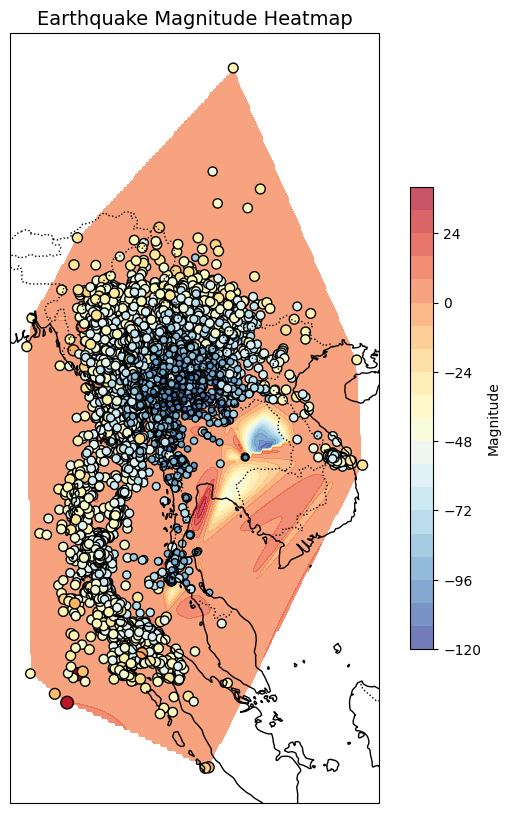

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata

# โหลดไฟล์
#file_path = "/mnt/data/all event .xlsx"
#f = pd.read_excel(file_path)

# สมมติว่ามีคอลัมน์ Latitude, Longitude, Magnitude
lats = df['lat'].values
lons = df['long'].values
mags = df['mag'].values

# สร้าง grid (lat, lon)
lon_lin = np.linspace(min(lons), max(lons), 200)
lat_lin = np.linspace(min(lats), max(lats), 200)
lon_grid, lat_grid = np.meshgrid(lon_lin, lat_lin)

# Interpolate magnitude บน grid
mag_grid = griddata((lons, lats), mags, (lon_grid, lat_grid), method='cubic')

# เริ่ม plot แผนที่
fig = plt.figure(figsize=(8, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# ใส่แผนที่พื้นหลัง
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# ระบายสี magnitude เป็น contour
contour = ax.contourf(lon_grid, lat_grid, mag_grid,
                      levels=20, cmap="RdYlBu_r", alpha=0.7,
                      transform=ccrs.PlateCarree())

# plot จุดจริงของแผ่นดินไหว
sc = ax.scatter(lons, lats, c=mags, cmap="RdYlBu_r", edgecolor="k",
                s=mags*10, transform=ccrs.PlateCarree())

# colorbar
cbar = plt.colorbar(contour, ax=ax, shrink=0.6, pad=0.05)
cbar.set_label("Magnitude")

ax.set_title("Earthquake Magnitude Heatmap", fontsize=14)
plt.show()


/tmp/ipython-input-714603562.py:47: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-714603562.py:47: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-714603562.py:47: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-714603562.py:47: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-714603562.py:47: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-714603562.py:47: UserWarning: Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-714603562.py:47: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

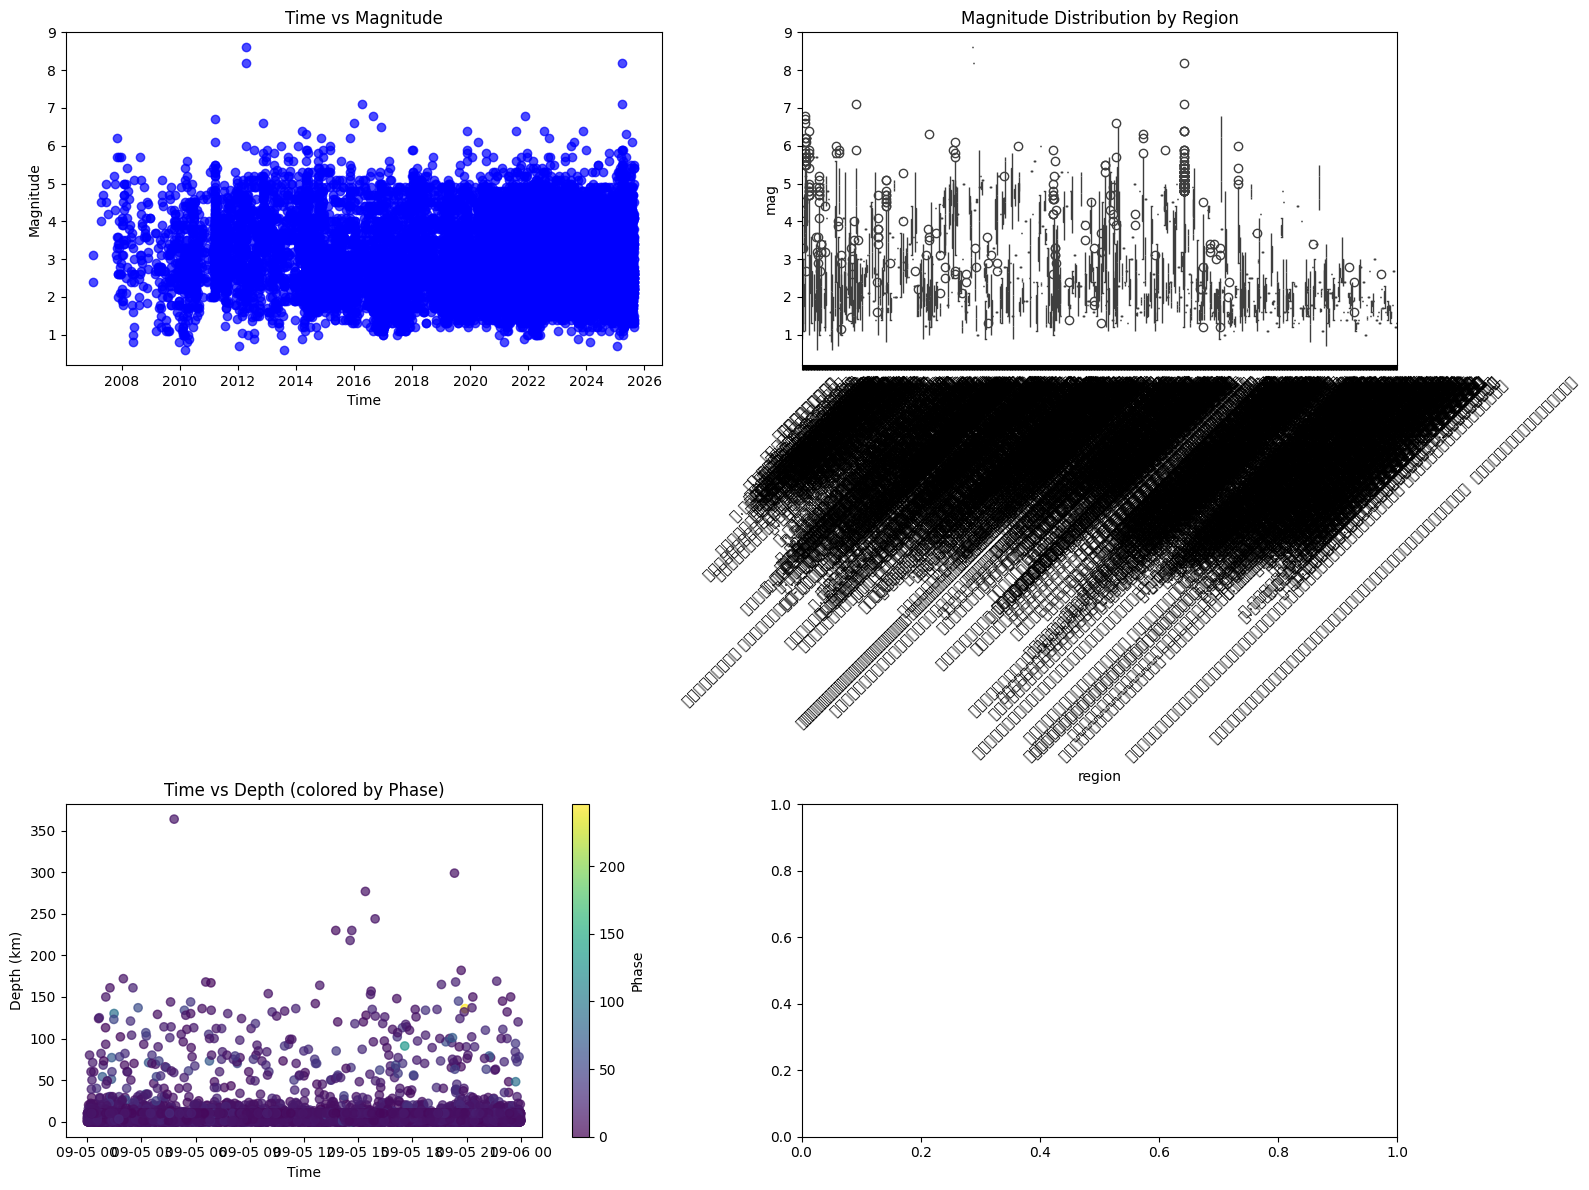

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# โหลดข้อมูล
#file_path = "/mnt/data/all event .xlsx"
#df = pd.read_excel(file_path)

# แปลงเวลาเป็น datetime
df["date"] = pd.to_datetime(df["date"])

# --- เตรียม bin สำหรับ magnitude ---
bins = [0,2,4,6,8]
df["Mag_bin"] = pd.cut(df["mag"], bins)

# สร้าง figure 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ===== 1. Time vs Magnitude =====
axes[0,0].scatter(df["date"], df["mag"], alpha=0.7, c="blue")
axes[0,0].set_title("Time vs Magnitude")
axes[0,0].set_xlabel("Time")
axes[0,0].set_ylabel("Magnitude")

# ===== 2. Magnitude vs Region =====
sns.boxplot(x="region", y="mag", data=df, ax=axes[0,1])
axes[0,1].set_title("Magnitude Distribution by Region")
axes[0,1].tick_params(axis="x", rotation=45)

# ===== 3. Time vs Depth (colored by Phase) =====
sc = axes[1,0].scatter(df["time"], df["depth"], c=df["phase"],
                       cmap="viridis", alpha=0.7)
axes[1,0].set_title("Time vs Depth (colored by Phase)")
axes[1,0].set_xlabel("Time")
axes[1,0].set_ylabel("Depth (km)")
cbar = fig.colorbar(sc, ax=axes[1,0])
cbar.set_label("Phase")

'''
# ===== 4. Frequency of Magnitude Range by Region =====
sns.countplot(x="Mag_bin", hue="region", data=df, ax=axes[1,1])
axes[1,1].set_title("Frequency of Magnitude Range by Region")
axes[1,1].set_xlabel("Magnitude Range")
axes[1,1].set_ylabel("Count")
'''

plt.tight_layout()
plt.show()


In [25]:
# Create DataFrame from a list of lists
# Use default indexing for both row and column
#df = pd.DataFrame( [ row0, row1, row2, row3, row4 ] )

# Inspect the data
print( f"type = {type(df)}" )
print( f"shape = {df.shape}" )
print( f"row index = {df.index}")
print( f"column index = {df.columns}" )
print( f"\ndtypes:\n{df.dtypes}\n" )


df.shape()
#df.head
#df.iloc(3,7)

type = <class 'pandas.core.frame.DataFrame'>
shape = (14986, 13)
row index = RangeIndex(start=0, stop=14986, step=1)
column index = Index(['No.', 'REF. ID', 'DATE-TIME UTC', 'DATE THAI', 'TIME THAI', 'LAT.',
       'LONG.', 'MAG.', 'DEPTH.', 'PHASE.', 'REGION.', 'REGION..1', 'DETAIL'],
      dtype='object')

dtypes:
No.                int64
REF. ID           object
DATE-TIME UTC     object
DATE THAI         object
TIME THAI         object
LAT.             float64
LONG.            float64
MAG.             float64
DEPTH.           float64
PHASE.             int64
REGION.           object
REGION..1         object
DETAIL            object
dtype: object



Index(['No.', 'REF. ID', 'DATE-TIME UTC', 'DATE THAI', 'TIME THAI', 'LAT.',
       'LONG.', 'MAG.', 'DEPTH.', 'PHASE.', 'REGION.', 'REGION..1', 'DETAIL',
       'Time'],
      dtype='object')


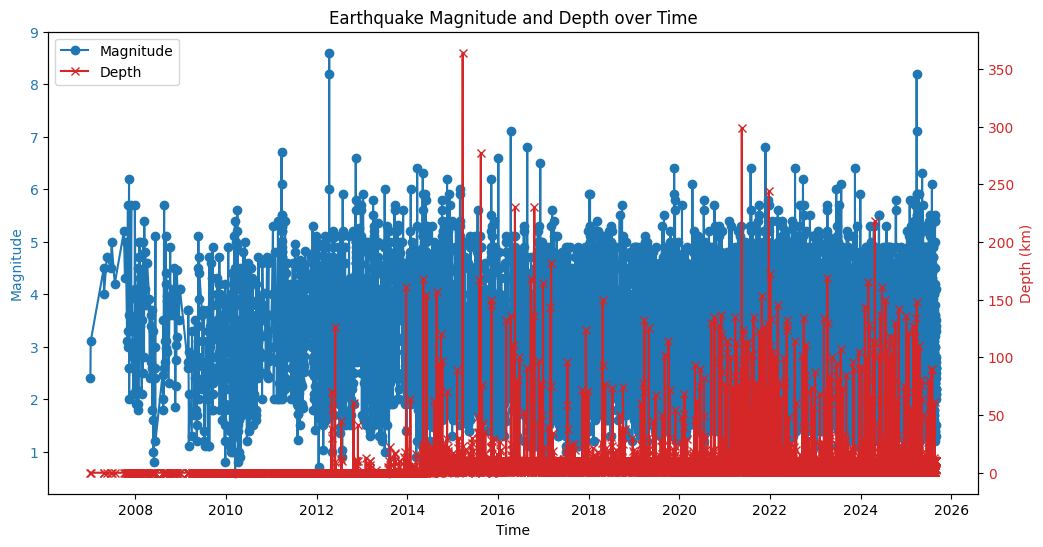

In [6]:
# use actual data
'''
import pandas as pd
import matplotlib.pyplot as plt
'''

# โหลดข้อมูลจากไฟล์ Excel
#file_path = "/mnt/data/all event .xlsx"
#df = pd.read_excel(file_path)

# ตรวจสอบชื่อคอลัมน์
print(df.columns)

# สมมติว่ามี column: Time, Magnitude, Depth
# ถ้า Time เป็น string ต้องแปลงเป็น datetime
df["Time"] = pd.to_datetime(df["DATE THAI"])

# เรียงตามเวลา (กันพลาด)
df = df.sort_values("Time")

# เริ่ม plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Magnitude (แกนซ้าย)
ax1.plot(df["Time"], df["MAG."], color="tab:blue", marker="o", label="Magnitude")
ax1.set_xlabel("Time")
ax1.set_ylabel("Magnitude", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# สร้างแกนขวาสำหรับ Depth
ax2 = ax1.twinx()
ax2.plot(df["Time"], df["DEPTH."], color="tab:red", marker="x", label="Depth")
ax2.set_ylabel("Depth (km)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# รวม legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.title("Earthquake Magnitude and Depth over Time")
plt.show()


In [6]:
# install package for map
!pip install cartopy folium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 104.5 MB/s eta 0:00:00


In [27]:
print(df.columns)

Index(['No.', 'REF. ID', 'DATE-TIME UTC', 'DATE THAI', 'TIME THAI', 'LAT.',
       'LONG.', 'MAG.', 'DEPTH.', 'PHASE.', 'REGION.', 'REGION..1', 'DETAIL'],
      dtype='object')


Index(['No.', 'REF. ID', 'DATE-TIME UTC', 'DATE THAI', 'TIME THAI', 'LAT.',
       'LONG.', 'MAG.', 'DEPTH.', 'PHASE.', 'REGION.', 'REGION..1', 'DETAIL'],
      dtype='object')


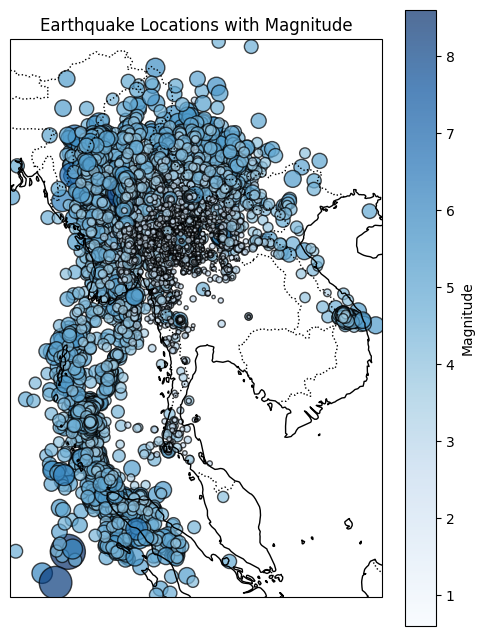

In [15]:
# use actual data

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# โหลดข้อมูลจากไฟล์ Excel
#file_path = "/mnt/data/all event .xlsx"   # path ที่คุณอัปโหลด
#df = pd.read_excel(file_path)

# ตรวจสอบชื่อคอลัมน์ก่อน (เพื่อดูว่า column ใช้ชื่อว่าอะไร)
print(df.columns)

# สมมติว่ามี column: 'Latitude', 'Longitude', 'Magnitude'
lat = df["LAT."]
lon = df["LONG."]
mag = df["MAG."]

# สร้างแผนที่
fig = plt.figure(figsize=(6, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# เพิ่มเส้นชายฝั่งและพรมแดน
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# ตั้งขอบเขตประเทศไทย (สามารถปรับได้)
ax.set_extent([90, 110, 0, 30], crs=ccrs.PlateCarree())

# plot จุดแผ่นดินไหว
sc = ax.scatter(
    lon, lat,
    c=mag, s=mag**3,   # ขนาดจุด ∝ magnitude
    cmap="Blues", alpha=0.7,
    edgecolor="k", transform=ccrs.PlateCarree()
)

# colorbar
plt.colorbar(sc, ax=ax, label="Magnitude")

plt.title("Earthquake Locations with Magnitude")
plt.show()


Index(['No.', 'REF. ID', 'DATE-TIME UTC', 'DATE THAI', 'TIME THAI', 'LAT.',
       'LONG.', 'MAG.', 'DEPTH.', 'PHASE.', 'REGION.', 'REGION..1', 'DETAIL'],
      dtype='object')


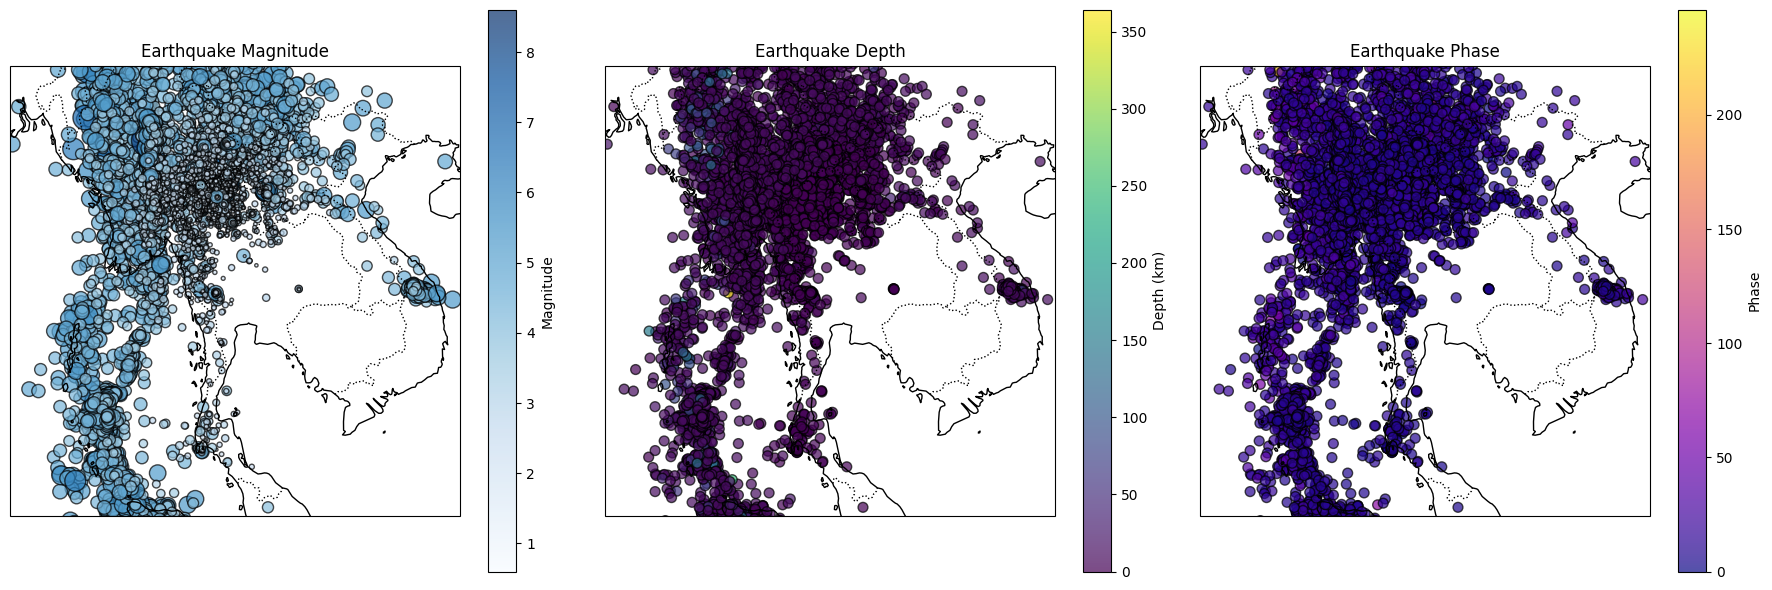

In [16]:
# use actual data
'''
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# โหลดไฟล์ Excel
file_path = "/mnt/data/all event .xlsx"
df = pd.read_excel(file_path)

'''

# ตรวจสอบชื่อ column
print(df.columns)

# สมมติว่ามีคอลัมน์: Latitude, Longitude, Magnitude, Depth, Phase
lat = df["LAT."]
lon = df["LONG."]
mag = df["MAG."]
depth = df["DEPTH."]
phase = df["PHASE."]



# กำหนดพื้นที่แผนที่ (ประเทศไทยและรอบๆ)
extent = [90, 110, 5, 25]

# --- Plot ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6),
                         subplot_kw={'projection': ccrs.PlateCarree()})

# ===== แผนที่ Magnitude =====
axes[0].add_feature(cfeature.COASTLINE)
axes[0].add_feature(cfeature.BORDERS, linestyle=":")
axes[0].set_extent(extent)
sc1 = axes[0].scatter(lon, lat, c=mag, s=mag**3,
                      cmap="Blues", alpha=0.7, edgecolor="k")
plt.colorbar(sc1, ax=axes[0], orientation="vertical", label="Magnitude")
axes[0].set_title("Earthquake Magnitude")

# ===== แผนที่ Depth =====
axes[1].add_feature(cfeature.COASTLINE)
axes[1].add_feature(cfeature.BORDERS, linestyle=":")
axes[1].set_extent(extent)
sc2 = axes[1].scatter(lon, lat, c=depth, s=50,
                      cmap="viridis", alpha=0.7, edgecolor="k")
plt.colorbar(sc2, ax=axes[1], orientation="vertical", label="Depth (km)")
axes[1].set_title("Earthquake Depth")

# ===== แผนที่ Phase =====
axes[2].add_feature(cfeature.COASTLINE)
axes[2].add_feature(cfeature.BORDERS, linestyle=":")
axes[2].set_extent(extent)
sc3 = axes[2].scatter(lon, lat, c=phase, s=50,
                      cmap="plasma", alpha=0.7, edgecolor="k")
plt.colorbar(sc3, ax=axes[2], orientation="vertical", label="Phase")
axes[2].set_title("Earthquake Phase")

plt.tight_layout()
plt.show()


In [4]:

# Test : Lat,Long,Magnitude

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

'''
# ข้อมูลตัวอย่าง (lat, lon, magnitude)
data = {
    "lat": [35.6, 36.2, 34.9, 37.1],
    "lon": [140.1, 141.5, 138.8, 142.0],
    "magnitude": [5.2, 6.1, 4.8, 7.0]
}
'''

# load data TM0001-004
data = {
    "lat": [4, 9.7, 20.8, 20.06],
    "lon": [96.9, 93.7, 100.93, 100.35],
    "magnitude": [5.2, 4.3, 5, 3.1]
}
df = pd.DataFrame(data)

# สร้างแผนที่
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# เพิ่มแผนที่พื้นฐาน
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
#ax.set_extent([135, 145, 33, 39])  # ขอบเขตแผนที่ (ญี่ปุ่น)
ax.set_extent([89, 110, -4, 38])  # ขอบเขตแผนที่ (Thai)

# plot จุดแผ่นดินไหว (ขนาดจุดขึ้นกับ magnitude)
sc = ax.scatter(
    df["lon"], df["lat"],
    c=df["magnitude"], s=df["magnitude"]**3,
    cmap="Reds", alpha=0.7, edgecolor="k", transform=ccrs.PlateCarree()
)

# ใส่ colorbar
plt.colorbar(sc, ax=ax, orientation="vertical", label="Magnitude")

plt.title("Earthquake Locations with Magnitude", fontsize=14)
plt.show()


ModuleNotFoundError: No module named 'cartopy'

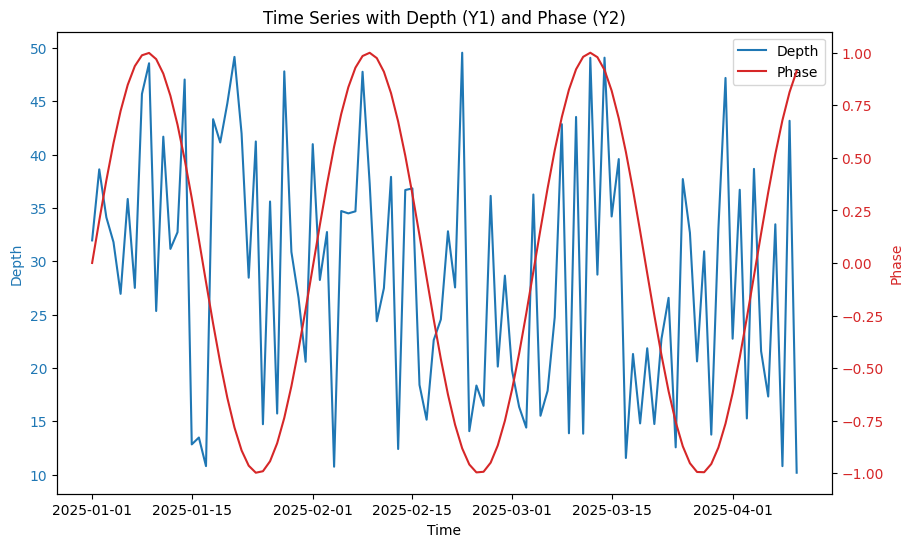

In [13]:
# example : Plot Depth and Phase vs Time series


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# สร้างข้อมูลตัวอย่าง
np.random.seed(0)
time = pd.date_range(start="2025-01-01", periods=100, freq="D")
depth = np.random.uniform(10, 50, size=100)   # แกน Y1
phase = np.sin(np.linspace(0, 20, 100))       # แกน Y2

# เริ่ม plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Depth (Y1)
ax1.plot(time, depth, color="tab:blue", label="Depth")
ax1.set_xlabel("Time")
ax1.set_ylabel("Depth", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# สร้างแกนที่สอง (Y2) สำหรับ Phase
ax2 = ax1.twinx()
ax2.plot(time, phase, color="tab:red", label="Phase")
ax2.set_ylabel("Phase", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# เพิ่ม legend จากทั้งสองแกน
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.title("Time Series with Depth (Y1) and Phase (Y2)")
plt.show()


In [ ]:

# ปรับปรุงคอลัมน์ 'DATE THAI' ให้อยู่ในรูปแบบวันที่
df['DATE THAI'] = pd.to_datetime(df['DATE THAI'])

# 1. แผ่นดินไหวเกิดขึ้นบ่อยที่สุดในช่วงเดือนหรือฤดูกาลใด?
df['month'] = df['DATE THAI'].dt.month
monthly_counts = df['month'].value_counts().sort_index()

print('----------------------------------------------------')
print('1. จำนวนแผ่นดินไหวในแต่ละเดือน:')
print(monthly_counts)
print('เดือนที่เกิดแผ่นดินไหวบ่อยที่สุด:', monthly_counts.idxmax())

# 2. มีแนวโน้มการเพิ่มขึ้นหรือลดลงของจำนวนแผ่นดินไหวในช่วง 10-20 ปีที่ผ่านมาหรือไม่?
df['year'] = df['DATE THAI'].dt.year
yearly_counts = df['year'].value_counts().sort_index()

print('\n----------------------------------------------------')
print('2. จำนวนแผ่นดินไหวในแต่ละปี:')
print(yearly_counts)

# 3. จังหวัดหรือภูมิภาคใดของไทยที่มีแผ่นดินไหวเกิดขึ้นบ่อยที่สุด?
top_regions = df['REGION.'].value_counts().head(10)

print('\n----------------------------------------------------')
print('3. 10 อันดับ จังหวัด/ภูมิภาค ที่เกิดแผ่นดินไหวบ่อยที่สุด:')
print(top_regions)

# 4. ค่าขนาดแผ่นดินไหว (Magnitude) เฉลี่ยในแต่ละภูมิภาคเป็นอย่างไร?
region_avg_magnitude = df.groupby('REGION.')['MAG.'].mean().sort_values(ascending=False).head(10)

print('\n----------------------------------------------------')
print('4. ค่าเฉลี่ย Magnitude ในแต่ละภูมิภาค (10 อันดับแรก):')
print(region_avg_magnitude)

print('----------------------------------------------------')